# Fit MSM to Dynophore Trajectory 

In [2]:
import pandas as pd
import numpy as np
time_ser = pd.read_json("Trajectories/ZIKV/ZIKV-Pro-427-1_dynophore_time_series.json")
time_ser = time_ser.drop(columns="num_frames")
obs = time_ser.drop_duplicates()
num_obs = len(obs)
print("There are actually ", num_obs, " present.")
obs = obs.to_numpy()
time_ser = time_ser.to_numpy()
print("The length of the observation sequence is ", len(time_ser))

There are actually  77  present.
The length of the observation sequence is  5001


## Label data

In [3]:
def label_traj(time_ser, obs):
    reduced_time_ser = np.zeros(len(time_ser))
    for i in range(len(time_ser)):
        for j in range(len(obs)):
            if compare_array(time_ser[i], obs[j]): 
                reduced_time_ser[i] = j
                break
    return reduced_time_ser.astype(np.int64)

def compare_array(arr1, arr2): 
    comp = arr1 == arr2 
    return comp.all()
red_time_ser = label_traj(time_ser, obs)

In [4]:
print(red_time_ser)

[ 0  1  2 ... 45 45 45]


In [5]:
import numpy as np
from deeptime.markov import TransitionCountEstimator

estimator = TransitionCountEstimator(
    lagtime=1,
    count_mode="sliding"
)


In [6]:
counts = estimator.fit(red_time_ser).fetch_model()  # fit and fetch the model

In [7]:
counts.count_matrix[counts.count_matrix>1]

array([8.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
       2.000e+00, 1.900e+01, 5.000e+00, 2.000e+00, 7.000e+00, 7.000e+00,
       2.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
       4.000e+00, 3.000e+00, 1.600e+01, 2.000e+00, 2.000e+00, 2.000e+00,
       2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
       2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
       4.000e+00, 7.000e+00, 9.000e+00, 5.000e+00, 1.400e+01, 2.000e+00,
       5.000e+00, 4.000e+01, 5.000e+00, 8.000e+00, 2.000e+00, 7.000e+00,
       1.400e+01, 6.000e+00, 1.080e+02, 2.000e+00, 3.000e+00, 2.000e+00,
       3.000e+00, 4.000e+00, 6.000e+00, 1.300e+01, 2.000e+00, 2.400e+01,
       2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 8.000e+00, 2.000e+00,
       8.000e+00, 2.400e+01, 8.180e+02, 6.100e+01, 4.500e+01, 7.000e+00,
       2.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 1.800e+01, 2.000e+00,
       6.600e+01, 2.444e+03, 2.000e+00, 1.130e+02, 

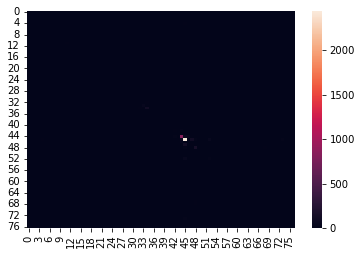

In [9]:
import seaborn as sns
ax = sns.heatmap(counts.count_matrix)